# Carseats

In [29]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,High_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1,0
4,4.15,141,64,3,340,128,38,13,0,0,1,0,0


In [ ]:
# IMPORTS 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from ISLP import load_data

In [57]:
# CLEAN DATA

#load
carseats = load_data('Carseats')

# Make target
carseats['High'] = np.where(carseats['Sales'] >= 7.5, 'Yes', 'No')

# get rid of strings
carseats = pd.get_dummies(carseats, drop_first = True)

# set X and y
X = carseats.drop(['High_Yes', 'Sales'], axis = 1)
y = carseats['High_Yes']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=27)

In [52]:
# Fit a classification tree
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

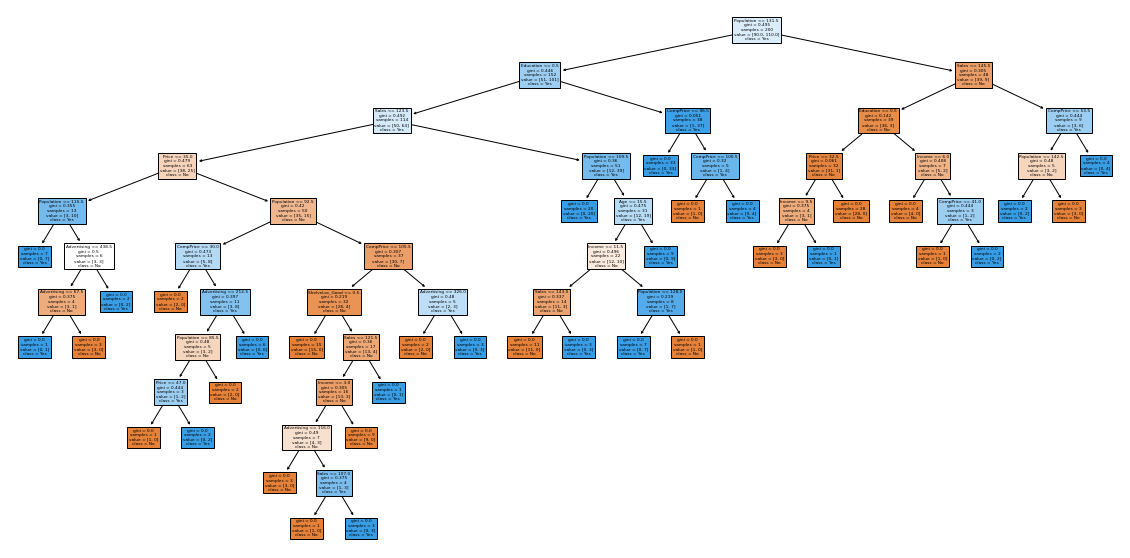

In [54]:
# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=carseats.columns, class_names=["No", "Yes"])
plt.show()

In [46]:
# Predictions and confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[109   2]
 [  0  89]]


# BOSTON

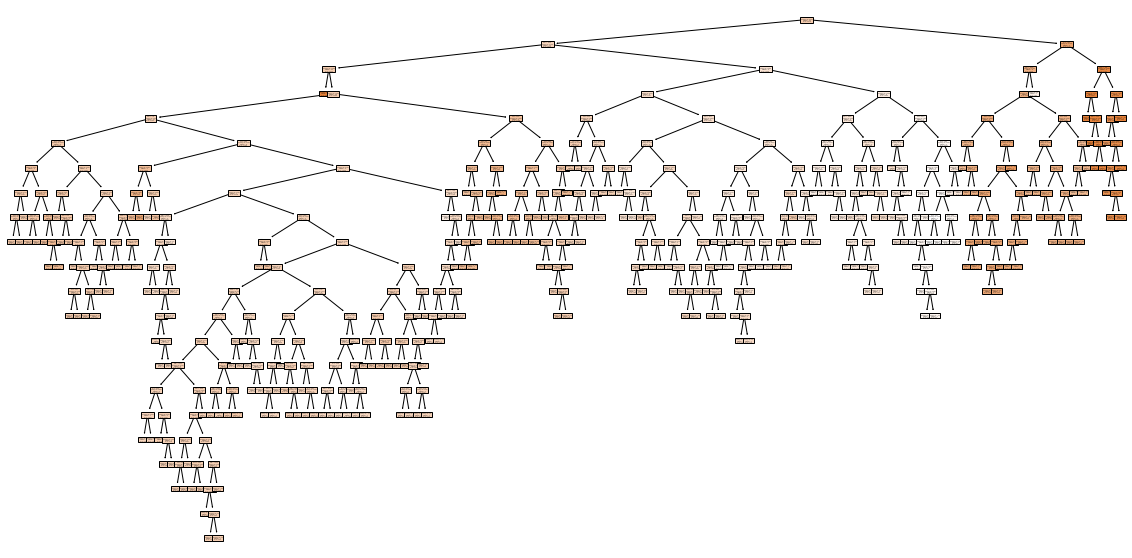

In [42]:
# For the 'Boston' dataset (regression tree)
boston = load_data('Boston')
X_boston = boston.drop('medv', axis = 1)
y_boston = data_boston['medv']

# Split the dataset
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.5, random_state=27)

# Fit a regression tree
reg = DecisionTreeRegressor(random_state=123)
reg.fit(X_train_boston, y_train_boston)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(reg, filled=True, feature_names=data_boston.columns)
plt.show()

In [49]:
# Predictions and mean squared error
y_pred_boston = reg.predict(X_test_boston)
mse = mean_squared_error(y_test_boston, y_pred_boston)
print("Mean Squared Error:", mse)

Mean Squared Error: 23.86913043478261
